In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [19]:
books=pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [20]:
books.shape

(13714, 10)

In [21]:
print (books.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB
None


In [22]:
books.head(50)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [23]:
#After glancing through the data, you will realize that some books have multiple authors.
#We thus want to perform analysis on each author so we have to split the authors

books['authors_list'] = 0
for i in range(len(books)):
    books['authors_list'][i] = books['authors'][i].split('-')
    
#declaring a new column to hold the number of authors a book has
books['num_author'] = [len(author_list) for author_list in books['authors_list']]
print(books['num_author'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        2
1        2
2        2
3        1
4        2
        ..
13709    2
13710    2
13711    2
13712    2
13713    1
Name: num_author, Length: 13714, dtype: int64


In [24]:
#Now let's see the number of books each author has published or co-published

#creating a dictionary to hold the name of all the authors in the dataset.

author_books_dict ={}
for authors in books['authors_list']:
    for author in authors:
        if author not in author_books_dict:
            author_books_dict[author] = 0
            
#let us update the dictionary with the number of books an author has written
for authors in books['authors_list']:
    for author in authors:
        author_books_dict[author] += 1

In [25]:
#author_books_dict

In [26]:
print(len(author_books_dict))

10457


In [27]:
#Time to visualize the number of books authors published

#Creating a dataframe out of the above dictionary
author_books_dict_df = pd.DataFrame()

author_books_dict_df['author'] = [i for i in author_books_dict]
author_books_dict_df['num_books'] = [author_books_dict[i] for i in author_books_dict]

author_books_dict_df.head()

,author,num_books
0,J.K. Rowling,37
1,Mary GrandPré,8
2,W. Frederick Zimmerman,2
3,Douglas Adams,22
4,Stephen Fry,2


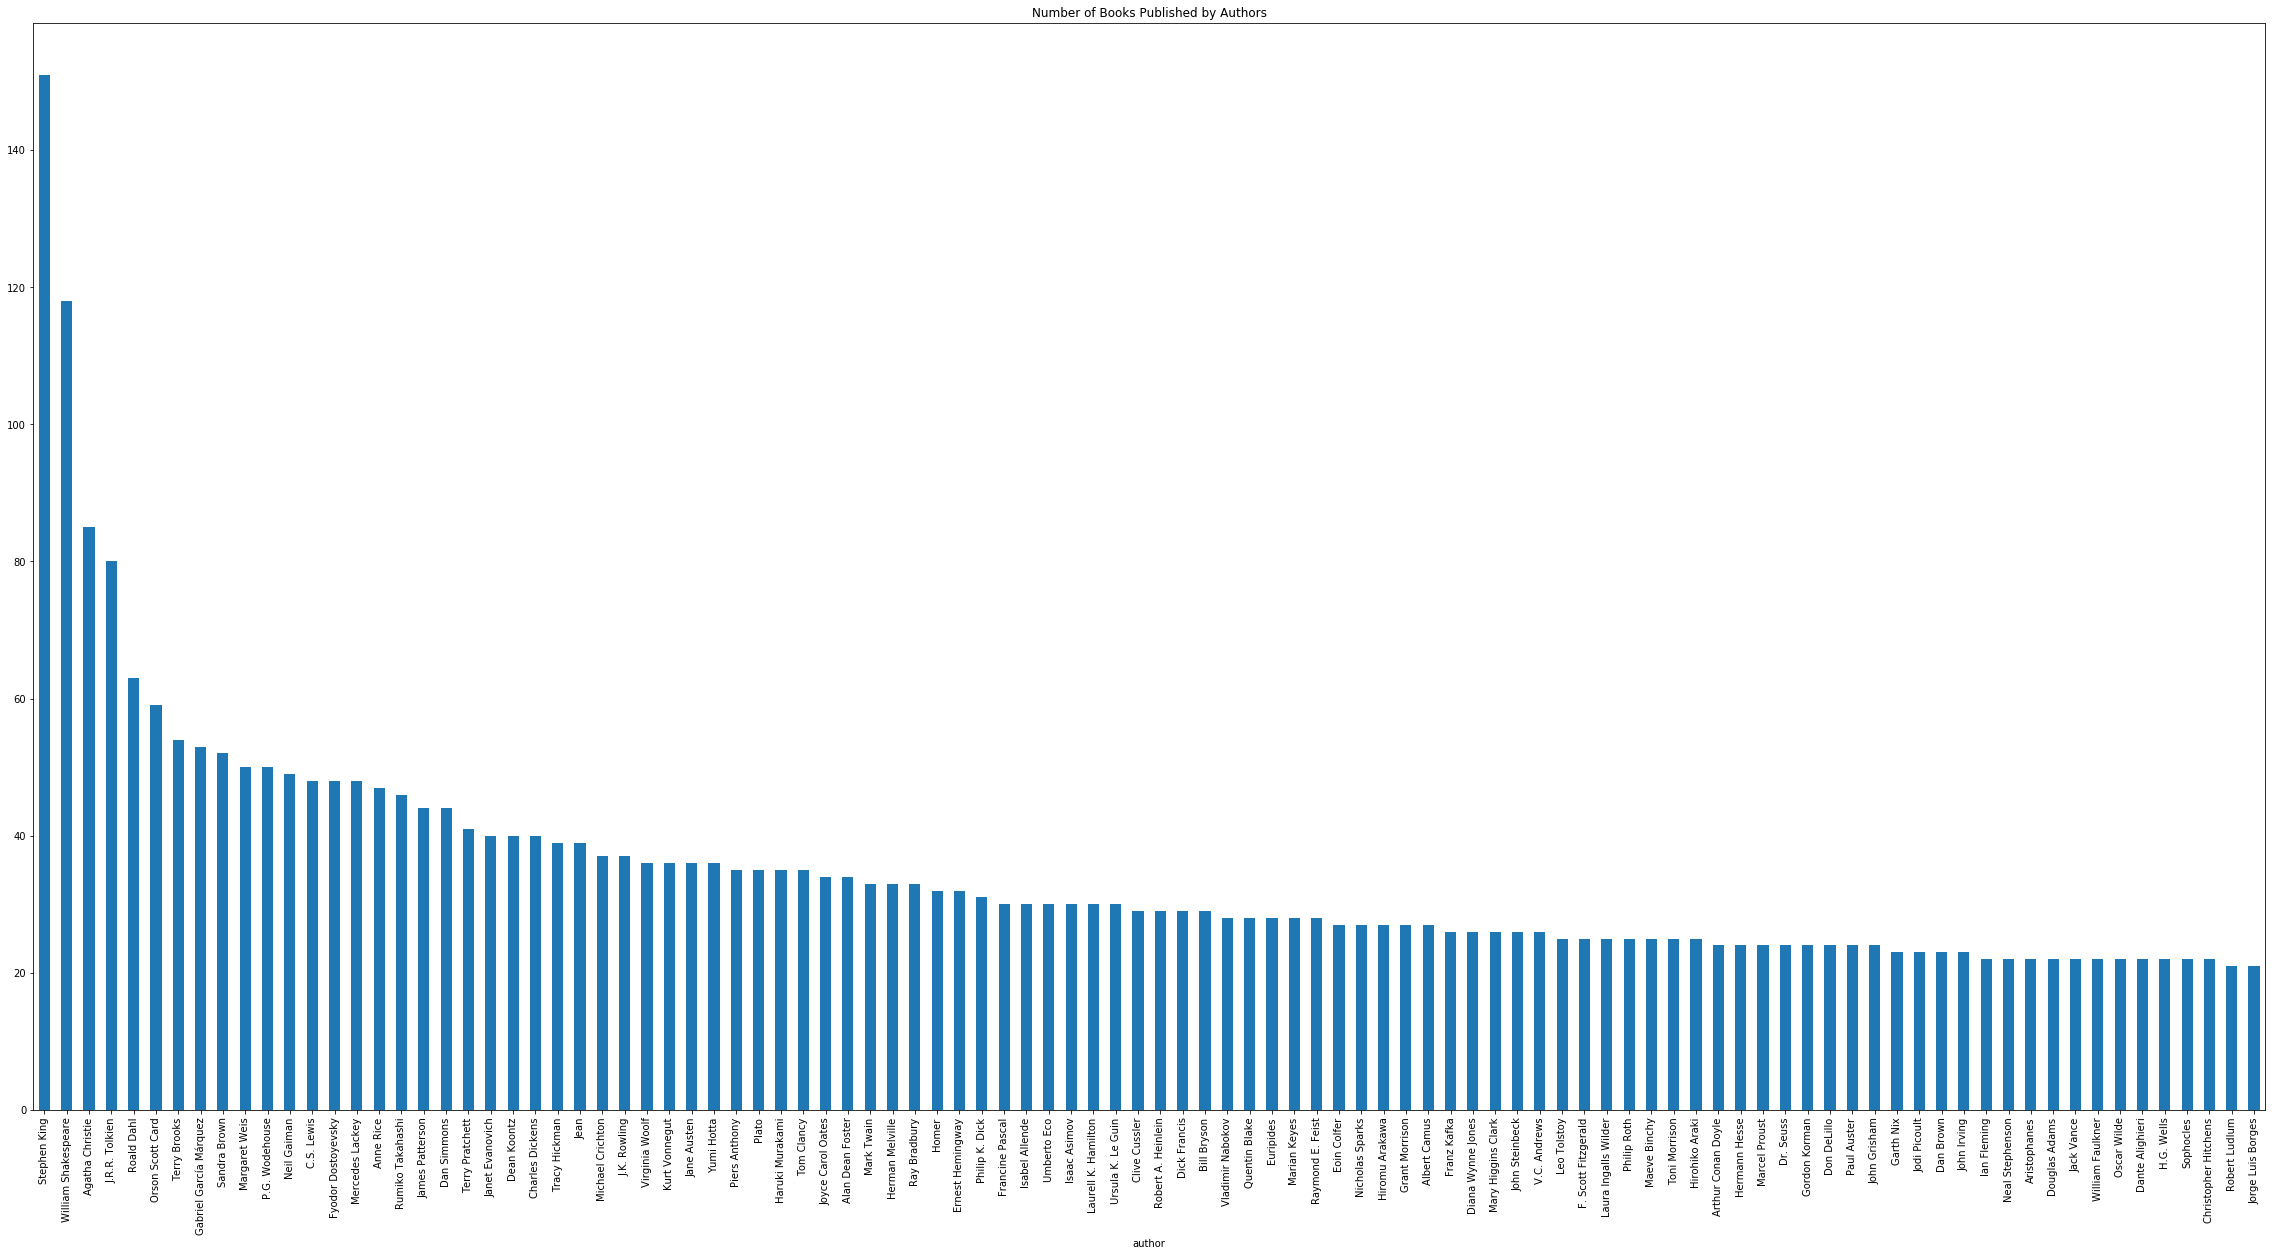

In [28]:
#Since most of the authors have similar number of publications, let's visualize
#the top 100 and middle 100 authors with the highest number of publications

author_books_dict_df = author_books_dict_df.sort_values(by=['num_books'], ascending=False)
author_books_dict_df = pd.concat([author_books_dict_df[:100], author_books_dict_df[-13600:-13700]])

author_books_dict_df.plot('author', 'num_books', figsize=(40,20), title='Number of Books Published by Authors', legend=False, kind='bar')    
                    

In [29]:
#Looking at exact number of books of some of the authors in descending order
author_books_dict_df.sort_values(by=['num_books'], ascending=False)

,author,num_books
1524,Stephen King,151
487,William Shakespeare,118
4282,Agatha Christie,85
7,J.R.R. Tolkien,80
1920,Roald Dahl,63
...,...,...
569,Aristophanes,22
310,Neal Stephenson,22
1180,Ian Fleming,22
2354,Robert Ludlum,21


In [30]:
#Let's loook at the average number of pages each author has written or co-written
#let's crete a dictionary to hold name of each author and the number of pages of their books

authors_pages_dict = {}

for authors in books['authors_list']:
    for author in authors:
        if author not in authors_pages_dict:
            authors_pages_dict[author] = []
            
#appending the number of pages of all authors books into list.
for i in range(len(books)):
    for author in books['authors_list'][i]:
                        authors_pages_dict[author].append(books['# num_pages'][i])
                        
#authors and num of pages now in a list.
                        

In [31]:
#taking the average of all the number of pages for each author

from statistics import mean

for i in authors_pages_dict:
    authors_pages_dict[i] = mean(authors_pages_dict[i])

In [32]:
#creating a dataframe out of the dictionary above
authors_pages_dict_df = pd.DataFrame()

authors_pages_dict_df['author'] = [i for i in authors_pages_dict]
authors_pages_dict_df['pages'] = [authors_pages_dict[i] for i in authors_pages_dict]

authors_pages_dict_df.head()

,author,pages
0,J.K. Rowling,628
1,Mary GrandPré,944
2,W. Frederick Zimmerman,282
3,Douglas Adams,323
4,Stephen Fry,387


In [55]:
#Let's see the author and average number of pages in descending order.
authors_pages_dict_df.sort_values(by=['pages'], ascending=False)

,author,pages
4798,Andreas Mayor,4211
9827,Frederick A. Blossom,3400
9828,Joseph Wood Crutch,3400
10332,Ronald Gottesman,2930
10331,Philip F. Gura,2930
...,...,...
5036,Kate Kinsella,892
3634,Ted Honderich,892
5035,Michal L. LeVasseur,892
6232,Mark Anestis,890


In [34]:
#Let us visualize what we have so far.

authors_pages_dict_df = authors_pages_dict_df.sort_values(by=['pages'], ascending=False)
authors_pages_dict_df = pd.concat([authors_pages_dict_df[:300], authors_pages_dict_df[-13614:-13714]])


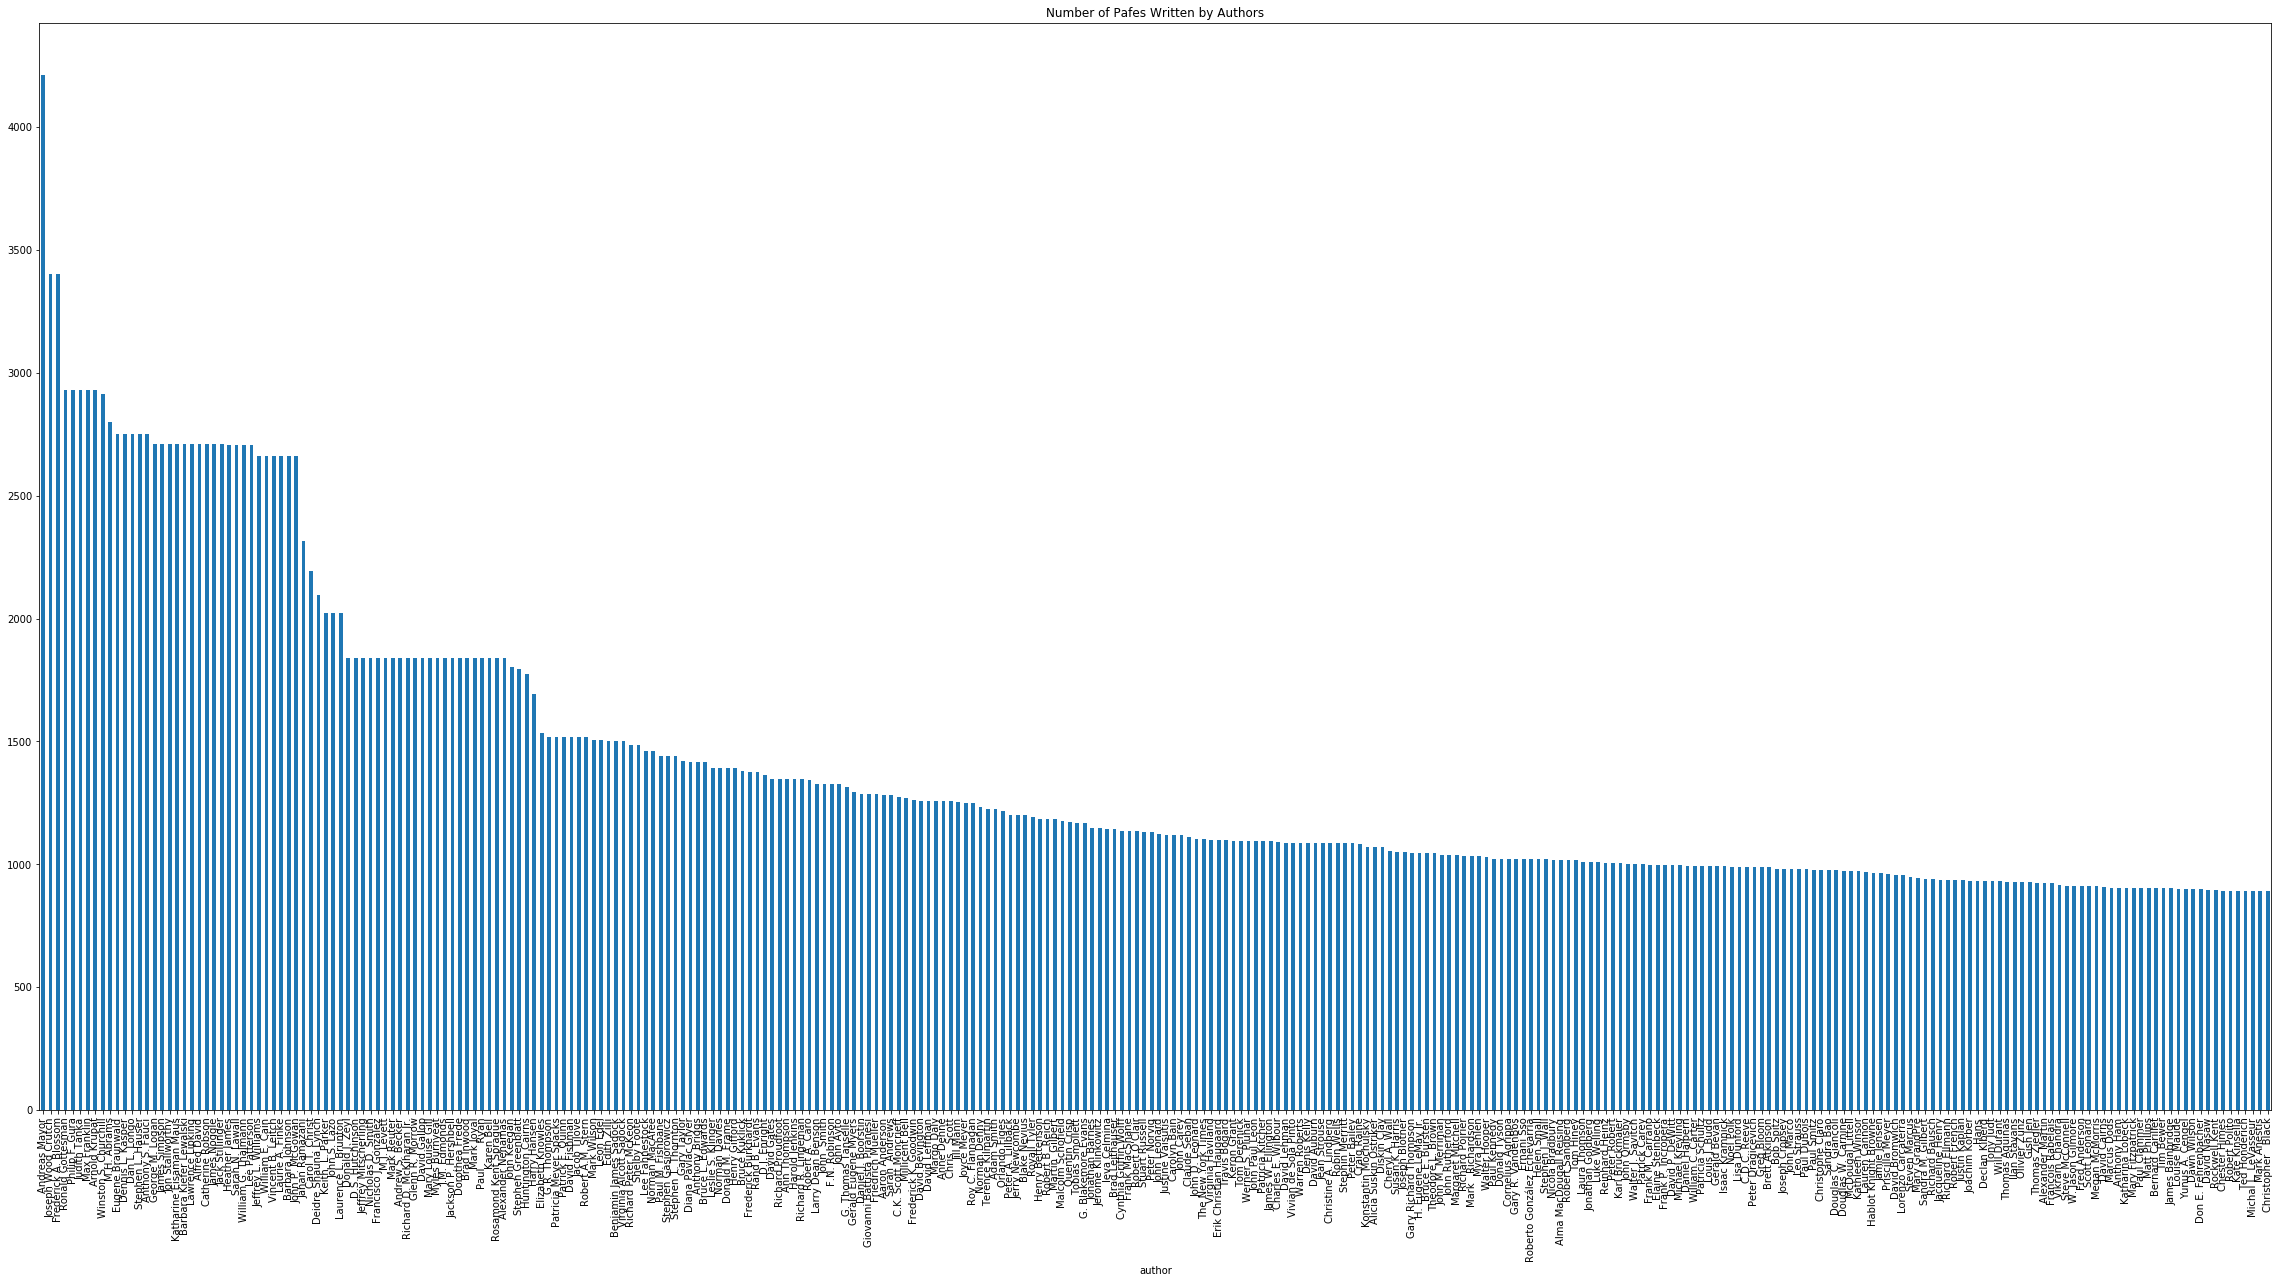

In [35]:
authors_pages_dict_df.plot('author', 'pages', figsize=(40,20),title='Number of Pafes Written by Authors', legend=False, kind='bar')

In [36]:
import seaborn as sns

In [64]:
#Let's investigate the effect of number of authors co-authoring a book

#creating a dataframe for investigating the effect of number of co-authors on a book's average rating.

num_authors_rating = books[['average_rating', 'num_author', 'authors','title']]
num_authors_rating.head(5).sort_values(by=['average_rating'], ascending=False)

,average_rating,num_author,authors,title
0,4.56,2,J.K. Rowling-Mary GrandPré,Harry Potter and the Half-Blood Prince (Harry ...
4,4.55,2,J.K. Rowling-Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...
1,4.49,2,J.K. Rowling-Mary GrandPré,Harry Potter and the Order of the Phoenix (Har...
2,4.47,2,J.K. Rowling-Mary GrandPré,Harry Potter and the Sorcerer's Stone (Harry P...
3,4.41,1,J.K. Rowling,Harry Potter and the Chamber of Secrets (Harry...


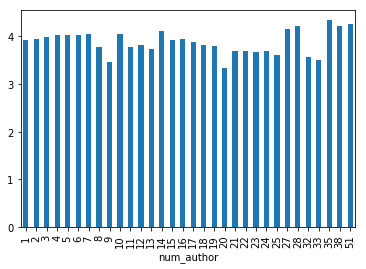

In [38]:
#A visualization of the average rating each class of number of co-authors
num_authors_rating.groupby(['num_author']).mean().plot(kind='bar', legend=False)

In [39]:
#From the graph it is clear that books with less co-authors (probably 14 or less) have, averagely higher ratings
# than books with more co-authors (say 23 or 35 co-authors)

In [70]:
#Now let's check how number of co-authors affect the number of pages (size) of a book

#creating a dataframe for investigating the effect of number of co-authors on a book's size
num_authors_pages = books[['# num_pages', 'num_author','authors']]
num_authors_pages.head().sort_values(by=['# num_pages'], ascending=False)

,# num_pages,num_author,authors
1,870,2,J.K. Rowling-Mary GrandPré
0,652,2,J.K. Rowling-Mary GrandPré
4,435,2,J.K. Rowling-Mary GrandPré
3,352,1,J.K. Rowling
2,320,2,J.K. Rowling-Mary GrandPré


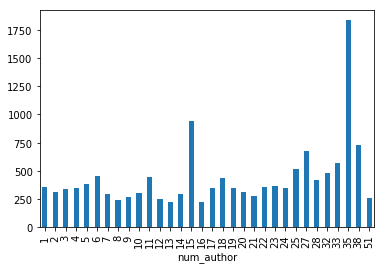

In [41]:
num_authors_pages.groupby(['num_author']).mean().plot(kind='bar', legend=False)

In [42]:
#It can be concluded from the above graph that, on the average, the more the co-authors, the larger the size of the book

In [43]:
#Let's look at the languages the books were written in
lang_code =(books['language_code'].unique().tolist())
print(lang_code)
print("\n")
print("Total num of languages of:", len(lang_code))

['eng', 'en-US', 'spa', 'fre', 'en-GB', 'mul', 'ger', 'ara', 'por', 'grc', 'en-CA', 'enm', 'jpn', 'dan', 'zho', 'nl', 'ita', 'lat', 'srp', 'rus', 'tur', 'msa', 'swe', 'glg', 'cat', 'wel', 'heb', 'nor', 'gla', 'ale']


Total num of languages of: 30


In [44]:
lang_count =books['language_code'].value_counts()
print(lang_count)
type(lang_count)

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
tur          3
cat          3
enm          3
lat          3
ara          2
heb          1
nor          1
dan          1
msa          1
wel          1
gla          1
srp          1
ale          1
Name: language_code, dtype: int64


pandas.core.series.Series

In [45]:
lang_count_df =lang_count.T.squeeze()

In [46]:
lang_count_df.head(30)

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
tur          3
cat          3
enm          3
lat          3
ara          2
heb          1
nor          1
dan          1
msa          1
wel          1
gla          1
srp          1
ale          1
Name: language_code, dtype: int64

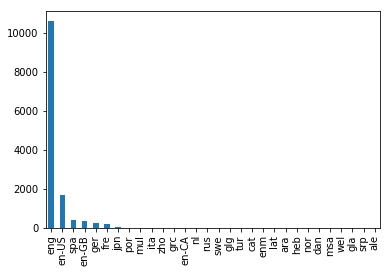

In [47]:
lang_count_df.plot(x="Language Code", y="Number of Books", kind='bar')

In [48]:
#From the above, most books were published in general english.

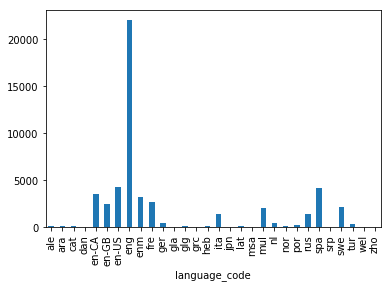

In [49]:
#So let us visualize how language affected rating

books.groupby("language_code")['ratings_count'].mean().plot(kind='bar')

In [50]:
#From the above, english books were the most rated books. 


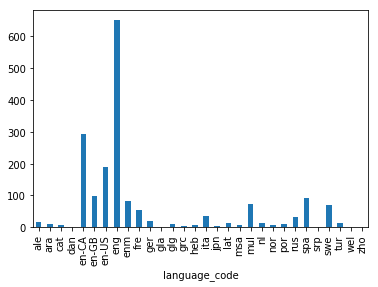

In [51]:
books.groupby("language_code")['text_reviews_count'].mean().plot(kind='bar')

In [52]:
#On the average, the text reviews count were mostly english books, 
#be it British english, american english etc.

In [53]:
import seaborn as sns

In [54]:
#sns.scatterplot(x='authors',y='# num_pages',hue='language_code',data=books)

In [ ]:
lang_count_df.plot(x="Language Code", y="Number of Books", kind='bar')